In [ ]:
import matplotlib.pyplot as plt
import json, numpy as np
from pathlib import Path

figpath = Path("/Users/yangjunjie/Downloads")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{color}\usepackage{colortbl}"

data = None
with open('../data/diamond-dzvp-kpt.json', 'r') as f:
    data = json.load(f)

for k, v in data.items():
    print(k, v)
    break


../benchmark/diamond/gth-dzvp/3-4-4/fftdf-100/kpt {'method': 'fftdf-100', 'basis': 'gth-dzvp', 'natm': 2.0, 'nkpt': 48.0, 'nao': 48.0, 'time_build_df': 0.0, 'naux': 24334.0, 'time_krks': 6.76, 'ene_krks': -11.33800429, 'time_krhf': 1428.54, 'ene_krhf': -11.00431373, 'time_kmp2': 8177.52, 'ene_kmp2': -11.26572833, 'ene_corr_kmp2': -0.2614146}


In [820]:
def plot_and_make_table(index, table):
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec

    # Create figure with custom subplot sizes
    fig = plt.figure(figsize=(9, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])  # 2:1 ratio (8:4)

    ax1 = fig.add_subplot(gs[0])  # First subplot (larger, 8x4 equivalent)
    ax2 = fig.add_subplot(gs[1])  # Second subplot (smaller, 4x4 equivalent)

    # You can still use ax = ax1 if you want to maintain compatibility
    ax = ax1

    colors = ["blue", "red", "green", "purple"]
    methods = ["krks", "krhf", "kmp2", "kccsd"][:(index+1)]
    print(methods[-1])

    for imethod, method in enumerate(methods):
        x = []
        y = []
        e = []

        for k, v in data.items():
            if not v['method'] == "fftdf-100":
                continue

            if not v.get(f'time_{method}'):
                continue

            x.append(v['nkpt'] * v['natm'])
            y.append(v[f'time_{method}'])
            e.append(v[f'ene_{method}'])

        xx = np.array(x)
        yy = np.array(y)
        ee = np.array(e)
        ix = np.argsort(xx)
        xx = xx[ix]
        yy = yy[ix]
        ee = ee[ix]

        for x, e in zip(xx, ee):
            if not method == methods[-1]:
                continue
            print("natm = %4d, e = %12.6f" % (x, e / v['natm']))
        
        xx = np.log2(xx)
        a, b = np.polyfit(xx, np.log2(yy), 1)
        ax.semilogy(xx, yy, color=colors[imethod], marker='o', linestyle='none')
        ax.semilogy(xx, 2 ** (a * xx + b), color=colors[imethod], linestyle='dashed', alpha=0.5, label=method.upper())


    x = [v['nkpt'] * v['natm'] for k, v in data.items() if v['method'] == "fftdf-100"]
    x = np.unique(x)
    x.sort()
    x = np.log2(x)

    x = range(4, 12)
    xx = ["$2^{%d}$" % i for i in x]
    ax.set_xticks(x)
    ax.set_xticklabels(xx)
    ax.set_xlabel(r'$N_{\mathrm{atom}}$', fontsize=16)
    ax.set_ylabel('Time (s)', fontsize=16)
    # ax.set_title('Diamond', fontsize=14)
    ax.set_xlim(4, 11)
    ax.set_ylim(2, 36000)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12, bbox_to_anchor=(0.0, 1.12), framealpha=0, ncol=4, loc='upper left', columnspacing=1.2)

    ax = ax2
    # delete frame 
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])

    # make a Latex table with the energy of each method
    method = methods[index]
    color = colors[index]

    x = []
    y = []

    for k, v in data.items():
        if not v['method'] == "fftdf-100":
            continue

        if not v.get(f'ene_{method}'):
            continue

        x.append(v['nkpt'] * v['natm'])
        y.append(v[f'ene_{method}'] / v['natm'])

    xx = np.array(x)
    yy = np.array(y)
    ix = np.argsort(xx)
    xx = xx[ix]
    yy = yy[ix]

    dd = {}
    for x, y in zip(xx, yy):
        dd[x] = y

    # make the space larger
    content = r"\renewcommand{\arraystretch}{1.8} \begin{tabular}{cc} "
    content += r"\hline "
    content += r"$N_{\mathrm{atom}}$ & Energy Per Atom ($E_{\mathrm{h}}$) \\ "
    content += r"\hline "

    for x, d in table:
        # make the d to be blue
        n = "%.6f" % dd[x]
        content += r"%d & ${\bf %s} %s$ \\ " % (x, n[:(d+3)], n[(d+3):])

    content += r"\hline "
    content += r"\end{tabular}"

    scaling = a
    ax.text(0.2, 1.0, "Method: %s Scaling: $N^{%6.2f}$" % (method.upper(), scaling), fontsize=16, ha='left', va='top')
    ax.text(0.2, 0.85, content, fontsize=16, ha='left', va='top')
    plt.tight_layout()
    plt.show()

    fig.savefig(figpath / ("diamond-kpt-scaling-%d.png" % index), bbox_inches='tight')


krks
natm =   16, e =    -5.611388
natm =   24, e =    -5.640224
natm =   36, e =    -5.656564
natm =   54, e =    -5.660845
natm =   72, e =    -5.666141
natm =   96, e =    -5.669002
natm =  128, e =    -5.669517
natm =  192, e =    -5.670825
natm =  288, e =    -5.671640
natm =  432, e =    -5.671992
natm =  576, e =    -5.672081
natm =  768, e =    -5.672137
natm = 1024, e =    -5.672158
natm = 1280, e =    -5.672168
natm = 1600, e =    -5.672174
natm = 2000, e =    -5.672177


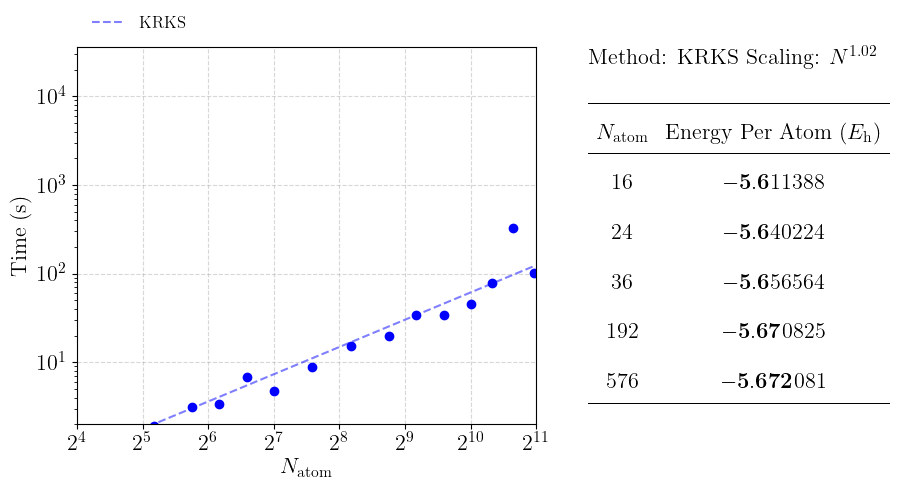

In [821]:
index = 0
table = [
    (16, 1),
    (24, 1),
    (36, 1),
    (192, 2),
    (576, 3),
]

plot_and_make_table(index, table)

krhf
natm =   16, e =    -5.464194
natm =   24, e =    -5.486127
natm =   36, e =    -5.497516
natm =   54, e =    -5.497977
natm =   72, e =    -5.501002
natm =   96, e =    -5.502157
natm =  128, e =    -5.501405
natm =  192, e =    -5.501269
natm =  288, e =    -5.501131
natm =  432, e =    -5.500870
natm =  576, e =    -5.500636
natm =  768, e =    -5.500452


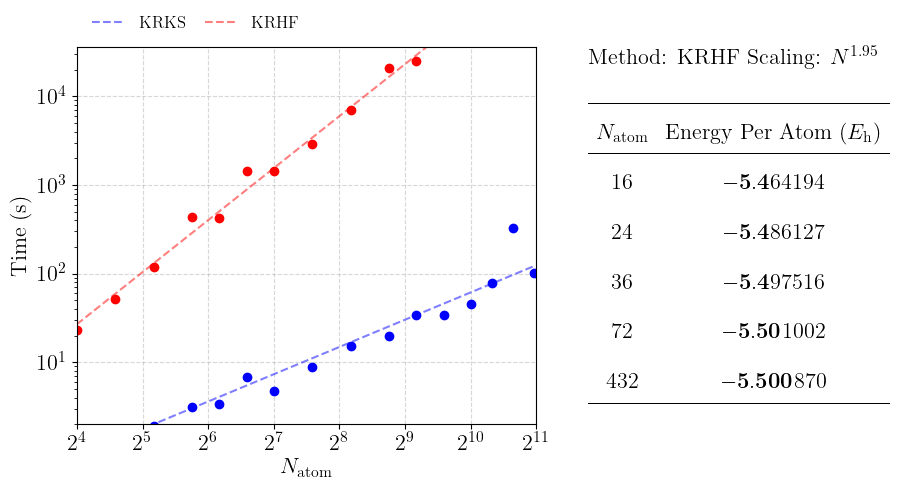

In [822]:
index = 1
table = [
    (16, 1),
    (24, 1),
    (36, 1),
    (72, 2),
    (432, 3),
    # (576, 3),
    # (768, 4),
    # (1600, 5)
]

plot_and_make_table(index, table)

kmp2
natm =   16, e =    -5.581078
natm =   24, e =    -5.608493
natm =   36, e =    -5.623118
natm =   54, e =    -5.624964
natm =   72, e =    -5.630340
natm =   96, e =    -5.632864
natm =  128, e =    -5.632621
natm =  192, e =    -5.633744


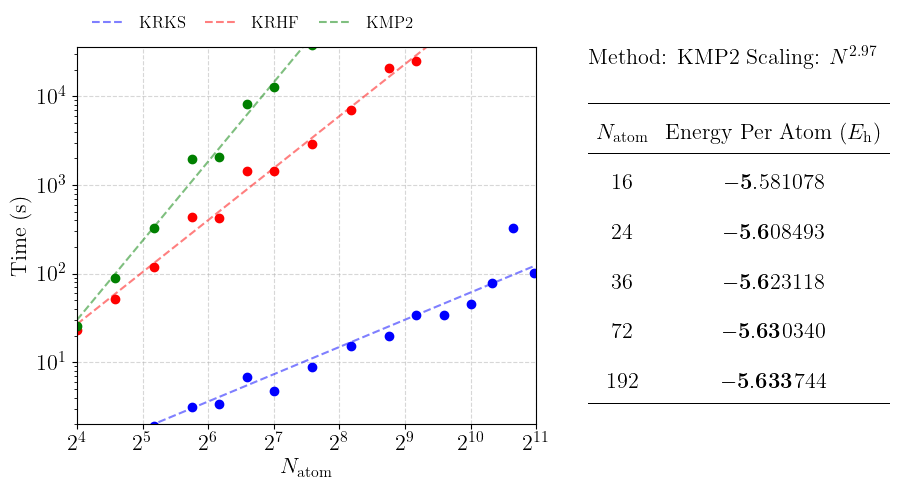

In [823]:
index = 2
table = [
    (16, 0),
    (24, 1),
    (36, 1),
    (72, 2),
    (192, 3),
]
plot_and_make_table(index, table)

kccsd
natm =   16, e =    -5.587091
natm =   24, e =    -5.611302
natm =   36, e =    -5.624116
natm =   54, e =    -5.625296
natm =   72, e =    -5.629394


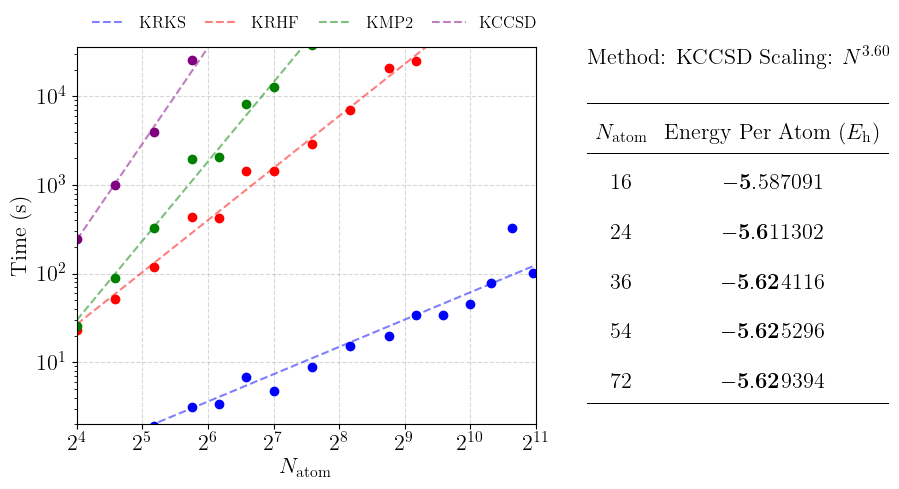

In [824]:
index = 3
table = [
    (16, 0),
    (24, 1),
    (36, 2),
    (54, 2),
    (72, 2),
]
plot_and_make_table(index, table)